In [42]:
tickers_list = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

# Fetch the data
import yfinance as yf
data = yf.download(tickers_list, start='2018-01-01', end='2022-01-01', interval = '1mo')['Close']

C:\Users\kevin\AppData\Local\Temp\ipykernel_5084\1956165412.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers_list, start='2018-01-01', end='2022-01-01', interval = '1mo')['Close']
[                       0%                       ]

[*********************100%***********************]  6 of 6 completed


In [43]:
# Print first 5 rows of the data
data.head()

Ticker,AAPL,AXP,BA,IBM,MU,WMT
Date,,,,,,
2018-01-01,39.293297,99.400002,337.712067,111.733025,42.701424,31.400488
2018-02-01,41.802082,97.510002,345.183563,106.361336,47.672840,26.513674
2018-03-01,39.535973,93.279999,314.009705,105.754311,50.925251,26.207323
2018-04-01,38.942162,98.750000,319.449432,99.916191,44.908779,26.212448
2018-05-01,44.034386,98.300003,337.262634,97.400398,56.248283,24.458237


Selecting IBM and AAPL.

In [44]:
cols = ['AAPL', 'WMT', 'IBM', 'MU', 'BA', 'AXP']

#now we have the returns of each stock present
returns = data[cols]
returns = returns.pct_change().dropna()
returns.head()

Ticker,AAPL,WMT,IBM,MU,BA,AXP
Date,,,,,,
2018-02-01,0.063848,-0.155629,-0.048076,0.116423,0.022124,-0.019014
2018-03-01,-0.054210,-0.011554,-0.005707,0.068224,-0.090311,-0.043380
2018-04-01,-0.015020,0.000196,-0.055205,-0.118143,0.017323,0.058641
2018-05-01,0.130764,-0.066923,-0.025179,0.252501,0.055762,-0.004557
2018-06-01,-0.005599,0.044216,-0.000419,-0.089425,-0.042527,-0.003052


<Axes: xlabel='Date'>

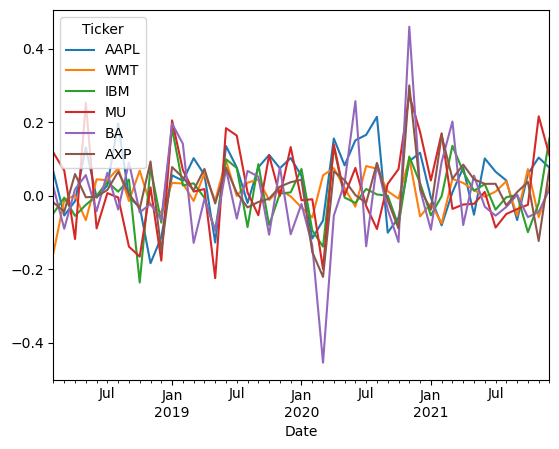

In [45]:
returns.plot()

Getting annualized volatility from monthly returns:

In [46]:
import numpy as np
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Ticker
AAPL    0.315823
WMT     0.179962
IBM     0.275317
MU      0.407469
BA      0.454304
AXP     0.283820
dtype: float64

Computing annualized returns:

In [47]:
n_months = returns.shape[0]
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

Ticker
AAPL    0.032202
WMT     0.008061
IBM     0.000714
MU      0.016254
BA     -0.010946
AXP     0.010658
dtype: float64

AAPL increases on average by 3.2 percent every month. AAPL increases by 46% every year. WOW.

In [48]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

Ticker
AAPL    0.462778
WMT     0.101134
IBM     0.008597
MU      0.213467
BA     -0.123726
AXP     0.135665
dtype: float64

In [49]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

Ticker
AAPL    0.462778
WMT     0.101134
IBM     0.008597
MU      0.213467
BA     -0.123726
AXP     0.135665
dtype: float64

In [50]:
annualized_return/annualized_vol

Ticker
AAPL    1.465307
WMT     0.561973
IBM     0.031225
MU      0.523885
BA     -0.272341
AXP     0.477998
dtype: float64

Sharpe Ratio:

In [51]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate #numerator
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio.sort_values(ascending=False)

Ticker
AAPL    1.370317
MU      0.450260
WMT     0.395271
AXP     0.372297
IBM    -0.077740
BA     -0.338376
dtype: float64

### Computing Maximum Drawdowns

In [52]:
returns.index[0:5]

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

Pulling out returns from 2019

In [53]:
returns.loc["2019"]

Ticker,AAPL,WMT,IBM,MU,BA,AXP
Date,,,,,,
2019-01-01,0.055154,0.034385,0.182546,0.204538,0.195721,0.077423
2019-02-01,0.040315,0.032975,0.027600,0.069597,0.140916,0.049075
2019-03-01,0.101731,-0.014749,0.033403,0.011007,-0.128702,0.014479
2019-04-01,0.056436,0.060119,-0.005882,0.017663,-0.009779,0.072553
2019-05-01,-0.127573,-0.013614,-0.094675,-0.224679,-0.095528,-0.021496
2019-06-01,0.134873,0.095002,0.098811,0.183379,0.071694,0.076105
2019-07-01,0.076394,-0.000996,0.074982,0.163255,-0.062718,0.007534
2019-08-01,-0.020184,0.035151,-0.085739,0.008465,0.067149,-0.032162
2019-09-01,0.077038,0.043797,0.085615,-0.053457,0.051510,-0.017363


Granularity is converted from days to month, making index interval larger

In [54]:
returns.index = returns.index.to_period('M')
returns.head()

Ticker,AAPL,WMT,IBM,MU,BA,AXP
Date,,,,,,
2018-02,0.063848,-0.155629,-0.048076,0.116423,0.022124,-0.019014
2018-03,-0.054210,-0.011554,-0.005707,0.068224,-0.090311,-0.043380
2018-04,-0.015020,0.000196,-0.055205,-0.118143,0.017323,0.058641
2018-05,0.130764,-0.066923,-0.025179,0.252501,0.055762,-0.004557
2018-06,-0.005599,0.044216,-0.000419,-0.089425,-0.042527,-0.003052


In [55]:
print(returns.info())
print(returns.describe())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 47 entries, 2018-02 to 2021-12
Freq: M
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    47 non-null     float64
 1   WMT     47 non-null     float64
 2   IBM     47 non-null     float64
 3   MU      47 non-null     float64
 4   BA      47 non-null     float64
 5   AXP     47 non-null     float64
dtypes: float64(6)
memory usage: 2.6 KB
None
Ticker       AAPL        WMT        IBM         MU         BA        AXP
count   47.000000  47.000000  47.000000  47.000000  47.000000  47.000000
mean     0.036239   0.009401   0.003864   0.022927  -0.002191   0.013936
std      0.091170   0.051950   0.079477   0.117626   0.131146   0.081932
min     -0.184045  -0.155629  -0.236624  -0.224679  -0.454664  -0.221232
25%     -0.025331  -0.018288  -0.043241  -0.036589  -0.064193  -0.019381
50%      0.056436   0.011777   0.001350   0.008465  -0.022993   0.015510
75%      0.101353   0.0440

The 25th, 50th, 75th percentile of all returns on the different stocks.

### Computing drawdown
Computed as a peak-to-trough decline during a specific period of investment. "The percentage between the peak and the subsequent trough (low)". 

Calculating drawdown involves:
* Convert our time series into a series of returns, each representing a wealth index
* Compute the time series over previous peaks
* Get the drawdown as the difference between the previous peak and the current value

Cumulative product: 
a cumulative product given a sequence {a, b, c} would be:

a <br>
a * b <br>
a * b * c

<Axes: xlabel='Date'>

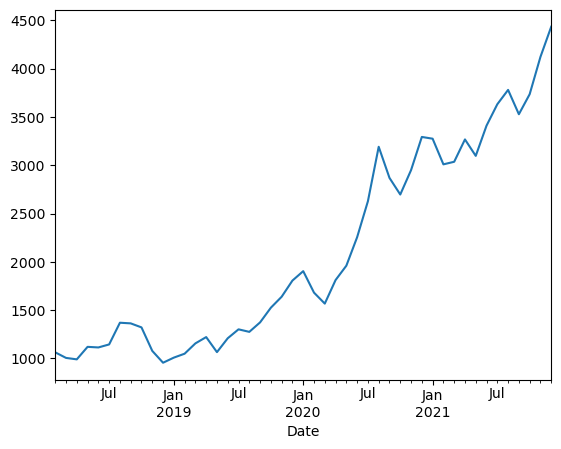

In [56]:
wealth_index = 1000*(1+returns['AAPL']).cumprod()
wealth_index.plot()

In the next block of code, we use a new function `cummax()`, which stores the maximum value up to a particular point in a time series

<Axes: xlabel='Date'>

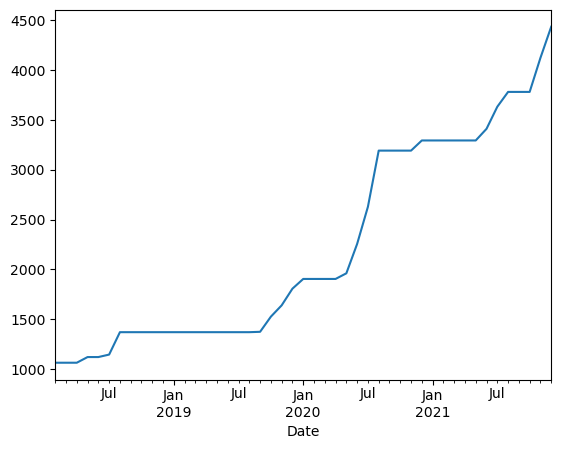

In [57]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

Drawdown is wealth index vs. previous peaks

wealth_index <= previous_peaks.

<Axes: xlabel='Date'>

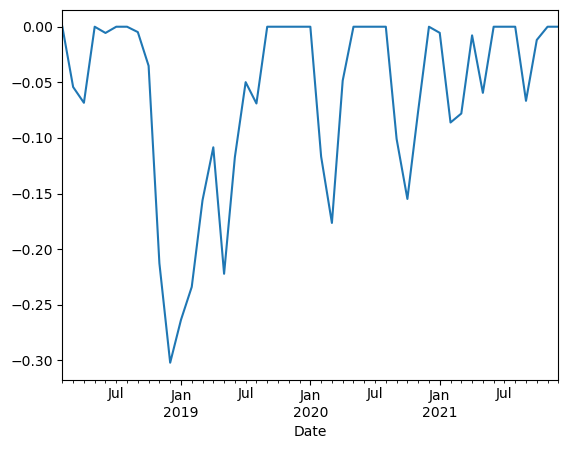

In [58]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [59]:
print(f"Min Drawdown occured at {drawdown.idxmin()} with a value of {drawdown.min():.2%}")

Min Drawdown occured at 2018-12 with a value of -30.22%


creating drawdown function (takes in time series and returns a time series as a Pandas DataFrame containing the wealth index, previous peaks, and drawdowns as a percentage.)

In [60]:
def drawdown(return_series):
    """This function takes in a time series of asset returns.
       It will return to the user a DataFrame with columns for
       the wealth index, previous peaks, and percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index,
                         "Previous Peak": previous_peaks,
                         "Drawdown": drawdowns})

drawdown(returns['IBM']).head()

,Wealth,Previous Peak,Drawdown
Date,,,
2018-02,951.923893,951.923893,0.000000
2018-03,946.491075,951.923893,-0.005707
2018-04,894.240458,951.923893,-0.060597
2018-05,871.724350,951.923893,-0.084250
2018-06,871.358903,951.923893,-0.084634


In [61]:
print(drawdown(returns['IBM']).min())
print(drawdown(returns['IBM']).idxmin())

Wealth           725.787878
Previous Peak    951.923893
Drawdown          -0.238690
dtype: float64
Wealth           2018-12
Previous Peak    2018-02
Drawdown         2018-12
dtype: period[M]


# Exercises (finish)

In [62]:
data = yf.download(['WMT', "TGT"], start='2010-01-01', end='2020-01-01', interval = '1mo')['Close']
returns = data.pct_change().dropna()
n_months = returns.shape[0]

annualized_return = (returns + 1).prod()**(12/n_months) - 1
annualied_vol = returns.std()*np.sqrt(12)
annualized_vol

C:\Users\kevin\AppData\Local\Temp\ipykernel_5084\3035315729.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(['WMT', "TGT"], start='2010-01-01', end='2020-01-01', interval = '1mo')['Close']
[*********************100%***********************]  2 of 2 completed


Ticker
AAPL    0.315823
WMT     0.179962
IBM     0.275317
MU      0.407469
BA      0.454304
AXP     0.283820
dtype: float64

In [63]:
riskfree_rate = 0.04
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio.sort_values(ascending=False)

Ticker
WMT     0.394101
AAPL         NaN
AXP          NaN
BA           NaN
IBM          NaN
MU           NaN
TGT          NaN
dtype: float64

Calculating volatility

In [64]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()

volatility = np.sqrt(mean_squared_deviations)
volatility

Ticker
TGT    0.065349
WMT    0.048059
dtype: float64

Since target is more volatile than walmart, it is less stable.

Getting drawdowns for Target and Walmart

In [65]:
dd_wmt = drawdown(returns['WMT'])
dd_tgt = drawdown(returns['TGT'])

max_dd_wmt = dd_wmt['Drawdown'].min()
date_max_dd_wmt = dd_wmt['Drawdown'].idxmin()

max_dd_tgt = dd_tgt['Drawdown'].min()
date_max_dd_tgt = dd_tgt['Drawdown'].idxmin()

In [66]:
print(f"Walmart Maximum Drawdown: {max_dd_wmt:.2%} on {date_max_dd_wmt}")
print(f"Target Maximum Drawdown: {max_dd_tgt:.2%} on {date_max_dd_tgt}")

Walmart Maximum Drawdown: -32.98% on 2015-10-01 00:00:00
Target Maximum Drawdown: -33.59% on 2017-06-01 00:00:00


Max drawdown/dates in year 2012

In [67]:
dd_2012_wmt = drawdown(returns['WMT']).loc['2012']
dd_2012_tgt = drawdown(returns['TGT']).loc['2012']

max_dd_wmt_2012 = dd_2012_wmt['Drawdown'].min()
date_max_dd_wmt_2012 = dd_2012_wmt['Drawdown'].idxmin()

max_dd_tgt_2012 = dd_2012_tgt['Drawdown'].min()
date_max_dd_tgt_2012 = dd_2012_tgt['Drawdown'].idxmin()

In [68]:
print(f"Walmart Maximum Drawdown in 2012: {max_dd_wmt_2012:.2%} on {date_max_dd_wmt_2012}")
print(f"Target Maximum Drawdown in 2012: {max_dd_tgt_2012:.2%} on {date_max_dd_tgt_2012}")

Walmart Maximum Drawdown in 2012: -9.05% on 2012-12-01 00:00:00
Target Maximum Drawdown in 2012: -13.68% on 2012-01-01 00:00:00


New Drawdown function

In [69]:
import pandas as pd

def drawDownV2(ticker):
    #get stock prices for ticker
    prices = yf.download(ticker, start='2010-01-01', end='2020-01-01', interval='1mo')['Close']

    prices = prices[ticker]

    #getting return series

    return_series = prices.pct_change().dropna()

    print(return_series.head())

    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks

    #print all of them just in case & for debugging

    result = pd.Dataframe({"Wealth": wealth_index,
                           "Previous Peak": previous_peaks,
                           "Drawdown": drawdowns})
    
    return result

drawDownV2('IBM').head()

C:\Users\kevin\AppData\Local\Temp\ipykernel_5084\321187524.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(ticker, start='2010-01-01', end='2020-01-01', interval='1mo')['Close']
[*********************100%***********************]  1 of 1 completed

Date
2010-02-01    0.038974
2010-03-01    0.013083
2010-04-01    0.005848
2010-05-01   -0.028992
2010-06-01   -0.009158
Name: IBM, dtype: float64


AttributeError: module 'pandas' has no attribute 'Dataframe'